In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
results_df = pd.read_pickle("saves/collapsed_results.pkl")  
results_df

,ecli,specific_drugs,general_drugs,countries,date
0,ECLI:NL:OGHACMB:2020:78,"[cocaïne, hennep]","[harddrugs, softdrugs]",[Curaçao],2020-12-03
1,ECLI:NL:OGHACMB:2020:82,"[cocaïne, hennep]","[harddrugs, softdrugs]",[Curaçao],2020-12-03
2,ECLI:NL:OGEAC:2018:352,"[hennep, hashish]",[softdrugs],[Curaçao],2018-06-29
3,ECLI:NL:OGEAC:2018:353,[cocaïne],[harddrugs],[Curaçao],2018-06-29
4,ECLI:NL:OGHACMB:2017:257,"[cocaïne, drugs]","[harddrugs, unspecified]","[Aruba, Belgium]",2017-01-16
...,...,...,...,...,...
2523,ECLI:NL:RBSGR:2011:BU9716,[drugs],[unspecified],[Sri Lanka],2011-10-21
2524,ECLI:NL:GHSHE:2020:1730,[hennep],[softdrugs],"[Netherlands, Germany]",2020-05-03
2525,ECLI:NL:HR:1998:ZD1191,"[cocaïne, hennep, marihuana, cocaïnetransport,...","[harddrugs, softdrugs]","[Netherlands, Suriname, Morocco, Nigeria, Roma...",1998-06-30
2526,ECLI:NL:GHSHE:2021:3205,[cocaïne],[harddrugs],"[Netherlands, Dominican Republic, Belgium]",2021-04-16


# Time Series

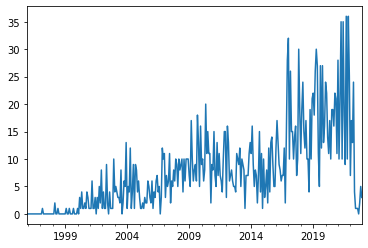

In [7]:
date_list = list(results_df['date'])
one_list = []
for i in date_list:
    one_list.append(1)
series = pd.Series(one_list, index=date_list)
series = series.resample('1M').sum()
series = series[200:]
series.plot()
plt.show()

In [79]:
vectorcounts = {}

for index, row in results_df.iterrows():
    locs = row['countries']
    for loc in locs:
        loc = loc.strip()
        if loc != "Netherlands":
            if loc not in vectorcounts:
                vectorcounts[loc] = [0]
            vectorcounts[loc][0] = vectorcounts[loc][0] + 1
            
print(vectorcounts)

{'Curaçao': [148], 'Aruba': [65], 'Belgium': [451], 'Argentina': [12], 'Colombia': [93], 'United States': [92], 'Jamaica': [4], 'Morocco': [90], 'France': [123], 'Suriname': [110], 'Sint Maarten': [22], 'Ecuador': [56], 'Germany': [409], 'Spain': [123], 'United Kingdom': [283], 'Sweden': [46], 'Turkey': [71], 'Panama': [44], 'Brazil': [70], 'Finland': [10], 'Portugal': [22], 'Poland': [53], 'Afghanistan': [2], 'China': [43], 'Canada': [11], 'Japan': [4], 'Dominican Republic': [47], 'Italy': [50], 'Lithuania': [10], 'Albania': [5], 'Denmark': [24], 'Peru': [29], 'Austria': [15], 'Mexico': [27], 'Australia': [35], 'Pakistan': [29], 'Grenada': [2], 'Russia': [4], 'Thailand': [8], 'Czechia': [8], 'The Gambia': [4], 'Venezuela': [53], 'Greece': [9], 'Trinidad and Tobago': [9], 'Singapore': [1], 'Croatia': [5], 'Norway': [43], 'Nigeria': [18], 'South Africa': [20], 'French Guiana': [3], 'Senegal': [2], 'Hungary': [7], 'New Zealand': [1], 'Luxembourg': [12], 'India': [5], 'Bolivia': [2], 'Ire

In [98]:
choropleth_df = pd.DataFrame(columns=['country', 'count'])

for loc in vectorcounts:
    choropleth_df = choropleth_df.append({'country': loc, 'count': vectorcounts[loc][0]}, ignore_index=True)

for index, row in choropleth_df:
    

choropleth_df

,country,count
0,Curaçao,148
1,Aruba,65
2,Belgium,451
3,Argentina,12
4,Colombia,93
...,...,...
97,Chile,1
98,Paraguay,1
99,Mozambique,2
100,Haiti,1


In [29]:
vectorcounts['THA'] = vectorcounts['Russia']


In [62]:
vectorcounts = {'Russia': [4]}

In [104]:
import plotly.express as px
import numpy as np
import pandas as pd

np.random.seed(12)
gapminder = px.data.gapminder().query("year==2007")
#gapminder['counts'] = np.nan

d = vectorcounts

yourdata = pd.DataFrame(d).T.reset_index()
yourdata.columns=['country', 'count']

df=pd.merge(gapminder, yourdata, how='left', on='country')
# df = gapminder
fig = px.choropleth(df, locations="iso_alpha",
                    color="count", 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [75]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [61]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'],
    z = df['GDP (BILLIONS)'],
    text = df['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP<br>Billions US$',
))

fig.update_layout(
    title_text='2014 Global GDP',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()